In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\dell\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\data_sa.csv")

In [3]:
df.head()

,Unnamed: 0,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [4]:
df = df[["text","selected_text","sentiment"]]

In [5]:
df.shape

(32296, 3)

In [6]:
df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [7]:
df.isna().sum()

text             1282
selected_text    4816
sentiment        1281
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text

In [10]:
df['text']= df['text'].apply(lambda x:remove_unnecessary_characters(x))

In [11]:
def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []

In [12]:
df['tokens'] = df['text'].apply(tokenize_text)

In [13]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text

In [14]:
df['text'] = df['text'].apply(normalize_text)

In [15]:
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()        
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text

In [16]:
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
    
df['selected_text'] = df["selected_text"].apply(wp)

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\dell\AppData\Local\Temp\ipykernel_7424\1934583485.py:2: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\dell\AppData\Local\Temp\ipykernel_7424\1934583485.py:6: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


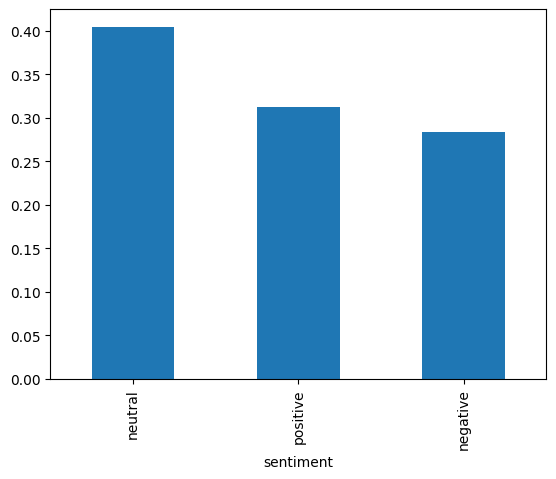

In [17]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [18]:
df['sentiment'] = df['sentiment'].map({'negative' : 0, 'positive': 1, 'neutral': 2})

In [19]:
count_vectorizer = CountVectorizer(stop_words="english")

In [20]:
X = df['selected_text']
y = df['sentiment']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=0.3,stratify=y)

In [22]:
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [23]:
model = MultinomialNB()
model.fit(count_train,y_train)

MultinomialNB()

In [24]:
pred = model.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
score

0.7668607472100922

In [25]:
alphas = np.arange(0,1,0.1)

def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(count_train,y_train)
    pred = nb_classifier.predict(count_test)
    score = metrics.accuracy_score(y_test,pred)
    return score

alpha_val = []
score = []

for alpha in alphas:
    print('Alpha: ', alpha)
    alpha_val.append(alpha)
    print('Score: ', train_and_predict(alpha))
    score.append(train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.749757399320718

Alpha:  0.1
Score:  0.7737748665696264

Alpha:  0.2
Score:  0.7731683648714216

Alpha:  0.30000000000000004
Score:  0.7734109655507035

Alpha:  0.4
Score:  0.7717127607957303

Alpha:  0.5
Score:  0.7712275594371665

Alpha:  0.6000000000000001
Score:  0.7691654536632703

Alpha:  0.7000000000000001
Score:  0.7690441533236293

Alpha:  0.8
Score:  0.7685589519650655

Alpha:  0.9
Score:  0.767224648229015



C:\Users\dell\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


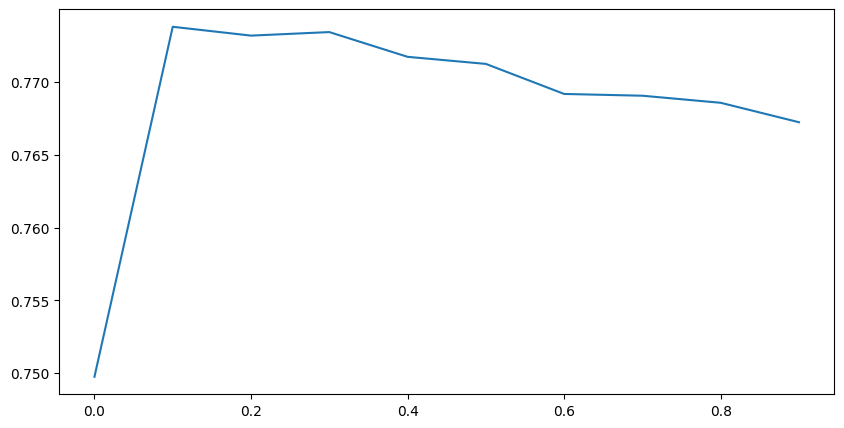

In [26]:
plt.figure(figsize=(10,5))
plt.plot(alpha_val,score)
plt.show()

In [27]:
best_model = MultinomialNB(alpha=0.1)
best_model.fit(count_train,y_train)
pred = best_model.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
score

0.7737748665696264

In [28]:
def output_lable(n,text):
    if n == 0:
        return f"The sentence '{text}' : \n --> Sentement is Negative"
    elif n == 2:
        return f"The sentence '{text}' : \n --> Sentement is Neutral"
    elif n == 1:
        return f"The sentence '{text}' : \n --> Sentement is Positive"

In [29]:
new_text = ["i am depressed","i am overwhelmed"]
new_features = count_vectorizer.transform(new_text)
prediction = best_model.predict(new_features)
for text,pred in zip(new_text,prediction):
    print(output_lable(pred,text))

The sentence 'i am depressed' : 
 --> Sentement is Negative
The sentence 'i am overwhelmed' : 
 --> Sentement is Negative


In [30]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier()

RFC_model.fit(count_train, y_train)

y_pred = RFC_model.predict(count_test)

metrics.accuracy_score(y_test, y_pred)

0.7510917030567685

In [32]:
new_text = ["I am happy","i`m sad","I have a work now",'I am excited']
new_features = count_vectorizer.transform(new_text)
prediction = RFC_model.predict(new_features)

for text,pred in zip(new_text,prediction):
    print(output_lable(pred,text))

The sentence 'I am happy' : 
 --> Sentement is Positive
The sentence 'i`m sad' : 
 --> Sentement is Negative
The sentence 'I have a work now' : 
 --> Sentement is Neutral
The sentence 'I am excited' : 
 --> Sentement is Positive
